<a href="https://colab.research.google.com/github/ryanhassell/IDS/blob/main/HW4/problem2_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ryan Hassell

# Cleaning and Importing Data

In [6]:
import pandas as pd
# import data from csv
nutrition = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv")

In [7]:
# print the imported data
nutrition.describe()

,weight_in_grams,saturated_fat,cholesterol
count,961.000000,961.000000,961.00000
mean,149.409365,3.987617,32.55359
std,175.909357,10.744359,119.96059
min,0.400000,0.000000,0.00000
25%,32.000000,0.000000,0.00000
50%,113.000000,0.400000,0.00000
75%,218.000000,3.300000,20.00000
max,1542.000000,119.900000,2053.00000


This data has some 0s in it, but these zeroes are, in this case, actually valid for this table. This is because this table displays nutrition facts, which can, and do, have 0s.

# Sorting the Data

In [16]:
# sort data by "saturated_fat" column
sorted_by_saturated_fat = nutrition.sort_values(by='saturated_fat', ascending=False)
print(sorted_by_saturated_fat.head(5))

                                  food item  weight_in_grams  saturated_fat  \
378  CHEESECAKE                    1 CAKE             1110.0          119.9   
535  ICE CREAM; VANLLA; RICH 16% FT1/2 GAL            1188.0          118.3   
458  YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE             1108.0           92.0   
581  CREME PIE                     1 PIE               910.0           90.1   
890  LARD                          1 CUP               205.0           80.4   

     cholesterol  saturated_fat_per_gram  scaled_saturated_fat_per_gram  
378         2053                0.108018                       1.071922  
535          703                0.099579                       0.944246  
458          609                0.083032                       0.693904  
581           46                0.099011                       0.935650  
890          195                0.392195                       5.371375  


According to this list, cheesecake is the worst. However, this list of items is not accurate in this sense because the size of each item is inconsistent. We need to compare stats by gram, not by the whole item.

In order to do this, we should create a new column saturated_fat_by_gram.

# Saturated Fat By Gram

In [9]:
# create new saturated fat per gram column
nutrition['saturated_fat_per_gram'] = nutrition['saturated_fat'] / nutrition['weight_in_grams']

# sort the new column
sorted = nutrition.sort_values(by='saturated_fat_per_gram', ascending=False)

print(sorted.head(5))

                                  food item  weight_in_grams  saturated_fat  \
908  BUTTER; SALTED                1 TBSP               14.0            7.1   
909  BUTTER; UNSALTED              1 TBSP               14.0            7.1   
710  BUTTER; UNSALTED              1/2 CUP             113.0           57.1   
709  BUTTER; SALTED                1/2 CUP             113.0           57.1   
913  BUTTER; UNSALTED              1 PAT                 5.0            2.5   

     cholesterol  saturated_fat_per_gram  
908           31                0.507143  
909           31                0.507143  
710          247                0.505310  
709          247                0.505310  
913           11                0.500000  


Now, when correctly comparing the five items, Butter now comes out to be the fattiest item.

#Standardization

In [31]:
from scipy import stats

# scale the data
nutrition['scaled_saturated_fat_per_gram'] = stats.zscore(nutrition.saturated_fat_per_gram, nan_policy='omit')

# get outliers
outliers = nutrition[(nutrition['scaled_saturated_fat_per_gram'] > 3) | (nutrition['scaled_saturated_fat_per_gram'] < -3)]

# sort
outliers.sort_values(by='scaled_saturated_fat_per_gram', ascending=False)

print("Column saturated_fat_per_gram has",len(outliers),"outliers.")
print(outliers)


Column saturated_fat_per_gram has 15 outliers.
                                  food item  weight_in_grams  saturated_fat  \
210  CHOCOLATE; BITTER OT BAKING   1 OZ                28.35            9.0   
448  COCONUT; RAW; SHREDDED        1 CUP               80.00           23.8   
492  COCONUT; DRIED; SWEETND;SHREDD1 CUP               93.00           29.3   
576  COCONUT; RAW; PIECE           1 PIECE             45.00           13.4   
709  BUTTER; SALTED                1/2 CUP            113.00           57.1   
710  BUTTER; UNSALTED              1/2 CUP            113.00           57.1   
890  LARD                          1 CUP              205.00           80.4   
898  FATS; COOKING/VEGETBL SHORTENG1 TBSP              13.00            3.3   
899  LARD                          1 TBSP              13.00            5.1   
907  FATS; COOKING/VEGETBL SHORTENG1 CUP              205.00           51.3   
908  BUTTER; SALTED                1 TBSP              14.00            7.1   
909  

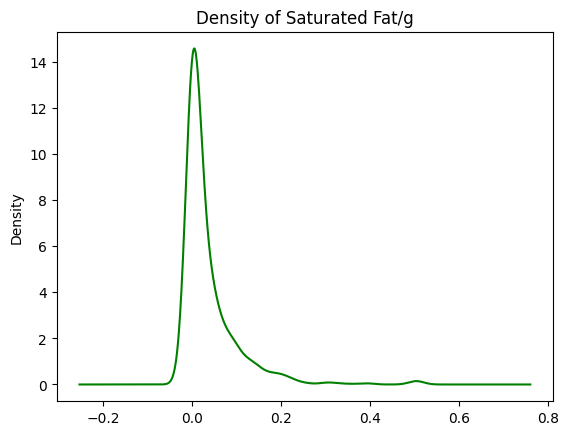

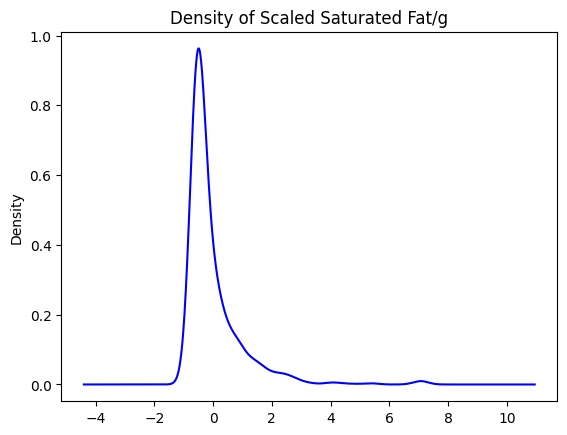

In [32]:
import matplotlib.pyplot as plt

# create plot of normal saturated fat
nutrition.saturated_fat_per_gram.plot.density(color="green")
plt.title('Density of Saturated Fat/g')
plt.show()

# create the plot of scaled saturated fat
nutrition.scaled_saturated_fat_per_gram.plot.density(color="blue")
plt.title('Density of Scaled Saturated Fat/g')
plt.show()


#High and Low ends

In [42]:
high = outliers.query('(scaled_saturated_fat_per_gram > 3)')
low = outliers.query('(scaled_saturated_fat_per_gram < -3)')

print("# of outliers on the high end of scale:",len(high))
print("# of outliers on the low end of scale:",len(low))

# of outliers on the high end of scale: 15
# of outliers on the low end of scale: 0


#Missing Values

In [33]:
# check for missing values
nutrition.isna().any()

food item                        False
weight_in_grams                  False
saturated_fat                    False
cholesterol                      False
saturated_fat_per_gram           False
scaled_saturated_fat_per_gram    False
scaled_cholesterol               False
scaled_weight_in_grams           False
dtype: bool

#Check other variables for outliers

In [34]:
# cholesterol
# scale the data
nutrition['scaled_cholesterol'] = stats.zscore(nutrition.cholesterol, nan_policy='omit')

# get outliers
outliers_chol = nutrition[(nutrition['scaled_cholesterol'] > 3) | (nutrition['scaled_cholesterol'] < -3)]

# sort
outliers_chol.sort_values(by='scaled_cholesterol', ascending=False)

print("Column saturated_cholesterol",len(outliers_chol),"outliers.")
print(outliers)

Column saturated_cholesterol 17 outliers.
                                  food item  weight_in_grams  saturated_fat  \
210  CHOCOLATE; BITTER OT BAKING   1 OZ                28.35            9.0   
448  COCONUT; RAW; SHREDDED        1 CUP               80.00           23.8   
492  COCONUT; DRIED; SWEETND;SHREDD1 CUP               93.00           29.3   
576  COCONUT; RAW; PIECE           1 PIECE             45.00           13.4   
709  BUTTER; SALTED                1/2 CUP            113.00           57.1   
710  BUTTER; UNSALTED              1/2 CUP            113.00           57.1   
890  LARD                          1 CUP              205.00           80.4   
898  FATS; COOKING/VEGETBL SHORTENG1 TBSP              13.00            3.3   
899  LARD                          1 TBSP              13.00            5.1   
907  FATS; COOKING/VEGETBL SHORTENG1 CUP              205.00           51.3   
908  BUTTER; SALTED                1 TBSP              14.00            7.1   
909  BUTTE

In [35]:
# weight
# scale the data
nutrition['scaled_weight_in_grams'] = stats.zscore(nutrition.weight_in_grams, nan_policy='omit')

# get outliers
outliers_weight = nutrition[(nutrition['scaled_weight_in_grams'] > 3) | (nutrition['scaled_weight_in_grams'] < -3)]

# sort
outliers_weight.sort_values(by='scaled_weight_in_grams', ascending=False)

print("Column saturated_cholesterol",len(outliers_weight),"outliers.")
print(outliers)

Column saturated_cholesterol 22 outliers.
                                  food item  weight_in_grams  saturated_fat  \
210  CHOCOLATE; BITTER OT BAKING   1 OZ                28.35            9.0   
448  COCONUT; RAW; SHREDDED        1 CUP               80.00           23.8   
492  COCONUT; DRIED; SWEETND;SHREDD1 CUP               93.00           29.3   
576  COCONUT; RAW; PIECE           1 PIECE             45.00           13.4   
709  BUTTER; SALTED                1/2 CUP            113.00           57.1   
710  BUTTER; UNSALTED              1/2 CUP            113.00           57.1   
890  LARD                          1 CUP              205.00           80.4   
898  FATS; COOKING/VEGETBL SHORTENG1 TBSP              13.00            3.3   
899  LARD                          1 TBSP              13.00            5.1   
907  FATS; COOKING/VEGETBL SHORTENG1 CUP              205.00           51.3   
908  BUTTER; SALTED                1 TBSP              14.00            7.1   
909  BUTTE

#Summary

Through the investigation, I have discovered that, when sorted correctly (by satfat/g), the highest content of saturated fats is in butters. In terms of outliers, I have concluded that:

*   Column 'cholesterol' has 17 outliers
*   Column 'weight' has 22 outliers
*   Column 'saturated_fat_per_gram' has 15 outliers

